# Milestone 3

# COVID-19 Response in India: An Analysis

## Introduction

The recent pandemic caused by the novel COVID-19 virus has caused 119,000 deaths in India. In humans, the virus is known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS) which may last long after diagnosis of the virus as well, causing lifelong damagaes to the body.

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

I am particularly interested in this dataset as India recently became the 2nd country with the most cases and is not too far behind USA. I wasn to know why this happened and how India can make better decisions using this data. The main question I want to asnwer is, does the 21-day lockdown really work?

## Goals

In this project, I will try to find answers to:
1. Whether India's 21 days of lockdown is useful.
2. Who is most affected by COVID-19?
3. How far should India flatten the curve so that medical services are not overwhelmed?

## Structure of the Analysis

1. Loading and Cleaning the Data
2. Exploratory Data Analysis
3. Detailed Analysis


## Loading and Cleaning the Data
In the following cells, we load and clean the dataset using Pandas and Numpy
Tasks 1,2 and 3 are completed in the following.


In [6]:
# Importing modules and frameworks
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from datetime import datetime, date, timedelta
# Performing relative import of the self defined functions
from scripts import project_functions as pf

In [9]:
# Getting data
directory = "C:/Users/yoits/OneDrive/Documents/GitHub/course-project-solo_331/data/raw/"
os.chdir(directory)
files = os.listdir()
print(files)

['complete.csv', 'covid_19_india.csv', 'district_level_latest.csv', 'nation_level_daily.csv', 'patients_data.csv', 'README.md', 'StatewiseTestingDetails.csv', 'state_level_daily.csv', 'state_level_latest.csv', 'tests_day_wise.csv', 'tests_state_wise.csv']


In [12]:
# Loading data by method chaining as required for both datasets

# Statewise Dataset
statewise_tests = pf.load_and_process(directory+'covid_19_india.csv', data_type="state")
# Printing the dataframe.head() for checking the df
print("Statewise Data: \n");print(statewise_tests.head());print("\n");print("*"*75)

# India-wide Dataset
# covid_19_india = pf.load_and_process(directory+'StatewiseTestingDetails.csv', data_type="india")

# # Printing the dataframe.head() for checking the df
# print("India-Wide Data: \n")
# print(covid_19_india)

KeyError: "['Negative'] not found in axis"

In [23]:
# We can now see that the 2 datasets are somehow redundant. 
df = covid_19_india.drop([0])
print(df)

           Date State/UnionTerritory   Cured  Deaths  Positives
1    2020-01-31               Kerala       0       0          1
2    2020-02-01               Kerala       0       0          2
3    2020-02-02               Kerala       0       0          3
4    2020-02-03               Kerala       0       0          3
5    2020-02-04               Kerala       0       0          3
...         ...                  ...     ...     ...        ...
7081 2020-10-07            Telengana  177008    1189     204748
7082 2020-10-07              Tripura   22623     301      27545
7083 2020-10-07          Uttarakhand   43238     677      52329
7084 2020-10-07        Uttar Pradesh  370753    6153     420937
7085 2020-10-07          West Bengal  243743    5318     277049

[7085 rows x 5 columns]


## The Dataset

In the dataset, we are focusing mainly on two tables.

1. India-Wide Data
        a. Columns: Date, State/Union Territory, Cured, Deaths, Positives
        b. Date: The date it was recorded on.
        c. State/Union Territory: Which State or Uninion Territory the Data applies to.
        d. Cured: The number of victims cured.
        e. Deaths: The number of deaths.
        f. Positives: The total positive cases.
 
2. State-Wide Data
        a. Columns: Date, State, Cumulative_Tests, Positive
        b. Date: The date it was recorded on.
        c. State: Which State or Uninion Territory the Data applies to.
        d. Cumulative_Tests: The cumulative number of people tested.
        e. Positives: The total positive cases.

##  Exploratory Data Analysis (EDA)
The following cells are used to conduct an EDA on the dataset.
Step 4 is completed.

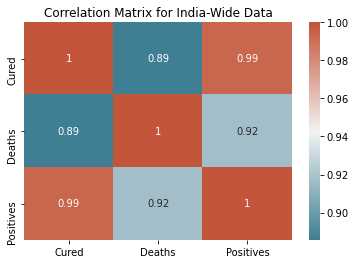

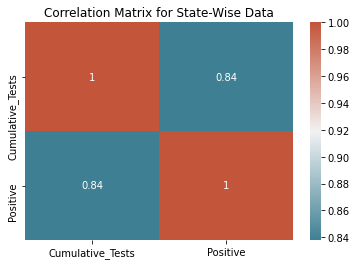

In [71]:
# Using plot_correlation_matrix from pf to generate heatmaps of correlation matrix.
pf.plot_correlation_matrix(df=covid_19_india)
plt.title(label="Correlation Matrix for India-Wide Data", fontdict=None, loc='center')
plt.show()
pf.plot_correlation_matrix(df=statewise_tests)
plt.title(label="Correlation Matrix for State-Wise Data", fontdict=None, loc='center')
plt.show()

### Interpreting the plots
In the above heatmaps of the correlation matrices, we see a few things:
1. There is a high positive corelation to the number of tests and positive results.
    - This might mean that there are more people not tested who might be infected.
2. There is also a positive correlation between the number of positive results and deaths.
    - This indicates the life threathning behaviour of the virus.

-----------------------------------------------------------------
Now, let us analyze the data using a scatterplot to see the correlations even deeper.
First, we look at the scatter plots between all the variables.

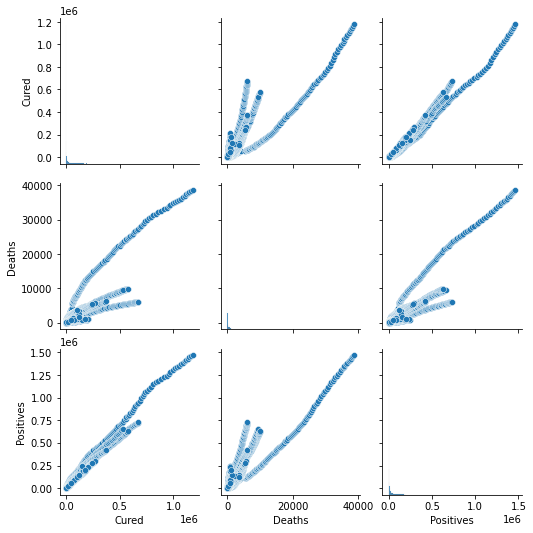

In [81]:
sns.pairplot(covid_19_india)
# plt.title(label="Scatter Plot for India-Wide Data", fontdict=None, loc='center')
plt.show()

### Interpreting the plots
This combination of plots show possible relationships between the different variables in data. Although it is very obvious, we see an evidence based positive linear relationship between Positive cases and Deaths. 

To get a closer look, let us create some individual scatter plots.

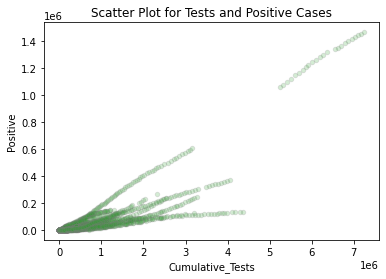

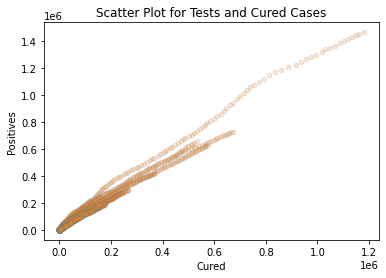

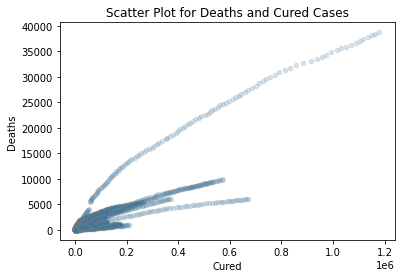

In [75]:
statewise_tests.plot(kind='scatter', x='Cumulative_Tests', y='Positive', color="tab:green", alpha=0.2, edgecolor="Grey")
plt.title(label="Scatter Plot for Tests and Positive Cases", fontdict=None, loc='center')
plt.show()
covid_19_india.plot(kind='scatter', x='Cured', y='Positives', color="tab:orange", alpha=0.2, edgecolor="Grey")
plt.title(label="Scatter Plot for Tests and Cured Cases", fontdict=None, loc='center')
plt.show()
covid_19_india.plot(kind='scatter', x='Cured', y='Deaths', color="tab:blue", alpha=0.2, edgecolor="Grey")
plt.title(label="Scatter Plot for Deaths and Cured Cases", fontdict=None, loc='center')
plt.show()

### Interpreting the plots
From the above scatter plots, it is clear that the number of people dying are more than the number of people cured. Moreover, the number of victims cured stops being significant after a certain amount of people testing positive. This may mean an overload on the hospitals; not allowing them to cater to everyone illness.

/home/yohen/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


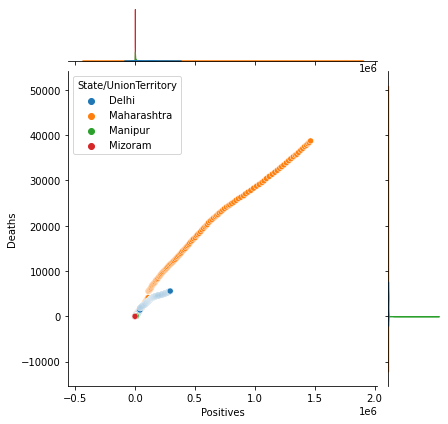

In [83]:
relevant_data = covid_19_india[((covid_19_india["State/UnionTerritory"]=="Maharashtra")
                                     |(covid_19_india["State/UnionTerritory"]=="Delhi") 
                                     |(covid_19_india["State/UnionTerritory"]=="Mizoram")
                                     |(covid_19_india["State/UnionTerritory"]=="Manipur"))]
sns.jointplot(data=relevant_data, x="Positives", y="Deaths", hue="State/UnionTerritory")

## Detailed Analysis

### Research Question 1
Are the 21 days of lockdowns effective? Meaning:
1. Did the number of postitive results reduce?
2. Did the number of cured patients change as medical facilities would ideally be not as overwhelmed.

To be able to determine this, we must first find out when these lockdowns were imposed. Extracted form [Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_lockdown_in_India#Lockdown), the following are the dates:
1. Phase 1 (25 March - 14 April)
2. Phase 2 (15 April - 03 May)
3. Phase 3 (04 May   - 17 May) Extension
4. Phase 4 (18 May   - 31 May) Extension

These four phases were continous so we will consider is as one. Meaning from 25 March to 31 May. Then, we will see if it reduced. 

Here, it is important to analyze the days before (we will consider 15 days into the loackdown as people infected before would test positive then) and after the lockdown. So the dates are as follows:
1. 10 March - 14 April, 
2. 1 June - 30 June

The reason I am only focusing on the initial stages of the pandemic is becasue this is the time things went out of hand in the country. As you can see below, the rise of cases throughout the country started in April.

![India Covid-19 Timeline: NYT](../images/Covid-19_India_Trend.png)

For the purpose of my research, I will focus on the worst state and the best states, in terms of number of cases.

Worst: Maharashtra, Delhi

Best : Mizoram, Manipur

Text(0.5, 1.0, 'Number of Deaths by Date')

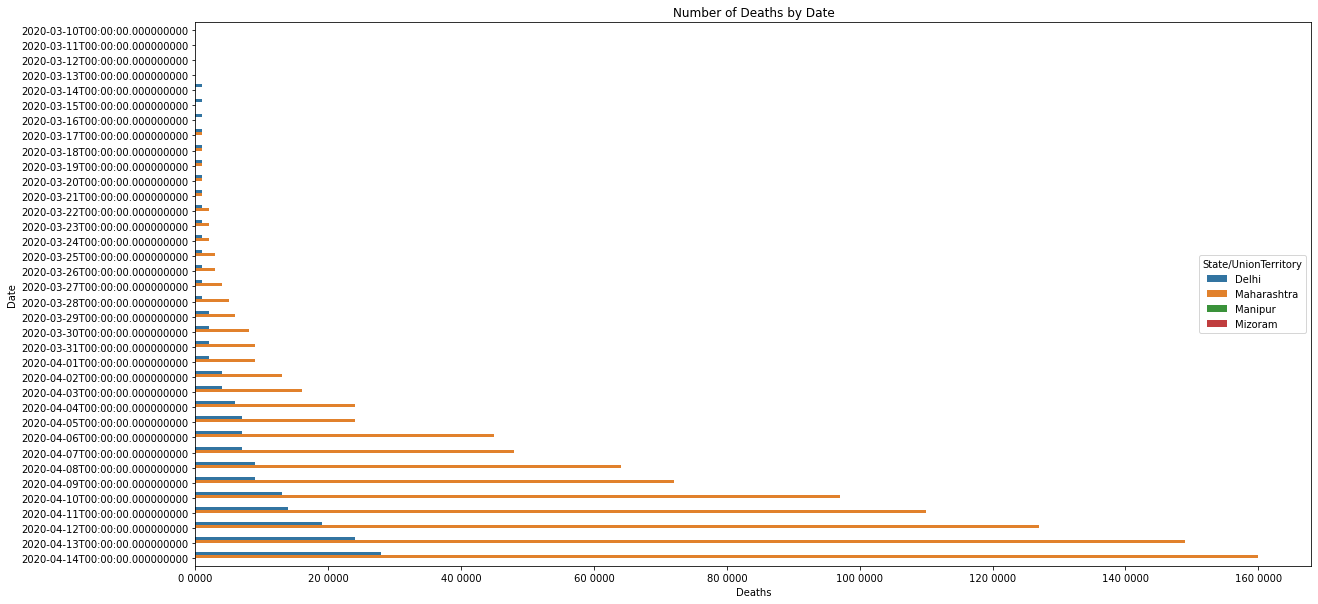

In [79]:
# Before the Lockdown
start = pd.to_datetime("10/03/2020", dayfirst=True)
end = pd.to_datetime("14/04/2020", dayfirst=True)
ax = plt.figure(figsize=(20,10))
data_before = covid_19_india[(covid_19_india["Date"]>=start) 
                                  & (covid_19_india["Date"]<=end) 
                                  & ((covid_19_india["State/UnionTerritory"]=="Maharashtra")
                                     |(covid_19_india["State/UnionTerritory"]=="Delhi") 
                                     |(covid_19_india["State/UnionTerritory"]=="Mizoram")
                                     |(covid_19_india["State/UnionTerritory"]=="Manipur"))]
sns.barplot(data=data_before, y="Date", x="Deaths", hue="State/UnionTerritory")
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d 0000'))
plt.title(label="Number of Deaths by Date - Before Lockdown", fontdict=None, loc='center')

Text(0.5, 1.0, 'Number of Deaths by Date - After Lockdown')

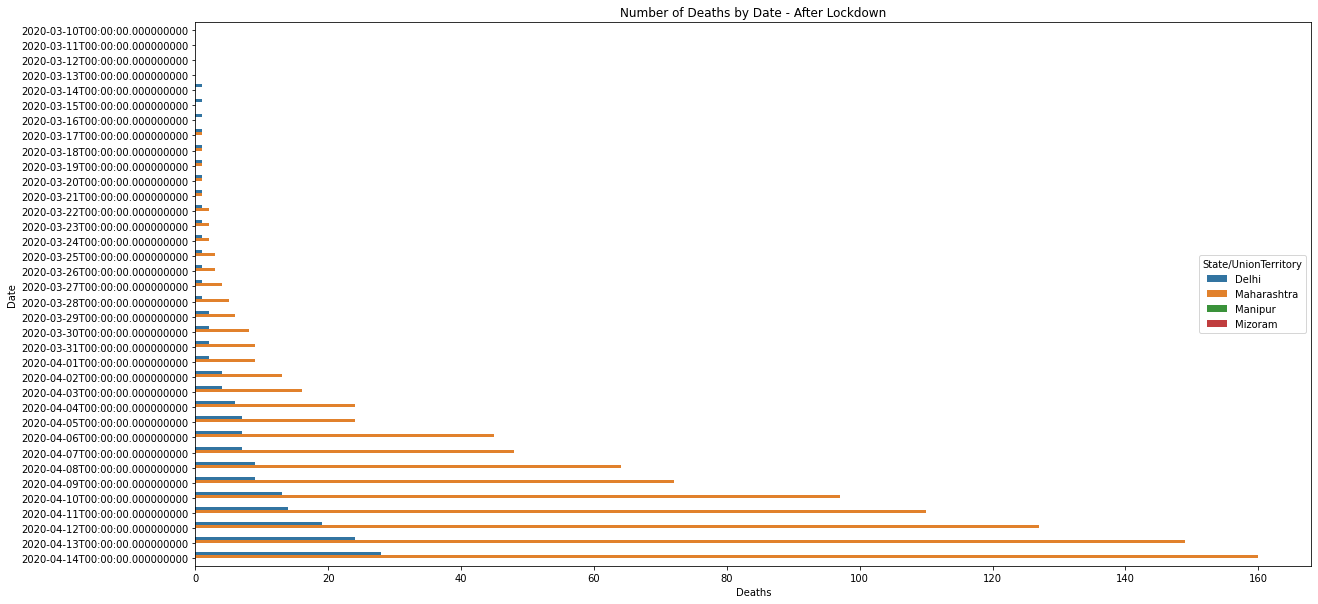

In [80]:
# After the Lockdown
start = pd.to_datetime("01/06/2020", dayfirst=True)
end = pd.to_datetime("30/06/2020", dayfirst=True)
ax = plt.figure(figsize=(20,10))
data_after = covid_19_india[(covid_19_india["Date"]>=start) 
                                  & (covid_19_india["Date"]<=end) 
                                  & ((covid_19_india["State/UnionTerritory"]=="Maharashtra")
                                     |(covid_19_india["State/UnionTerritory"]=="Delhi") 
                                     |(covid_19_india["State/UnionTerritory"]=="Mizoram")
                                     |(covid_19_india["State/UnionTerritory"]=="Manipur"))]
sns.barplot(data=data_before, y="Date", x="Deaths", hue="State/UnionTerritory")
plt.title(label="Number of Deaths by Date - After Lockdown", fontdict=None, loc='center')

### Summary

- **Research Question :** Was the country wide lockdown effective?

    - It is clear that the situation got worse after the lockdown. Hence it was not. 
    - Later on, the Government started Lockdowns for certain states and areas. In milestone 3, I will analyze if those were more effective in flattening the curve.

## Task 3: Process your data for your Tableau Dashboard

In [85]:
# Statewise Dataset
statewise_tests.to_csv("State_Data.csv",index=True)

# India-wide Dataset
covid_19_india.to_csv("India_Data.csv",index=True) 

# Adding other Datasets for more powerful analysis
Here, in Milestone 4, I am considering another Dataset that I recently discovered. 

In [38]:
# Getting data
directory = "C:/Users/yoits/OneDrive/Documents/GitHub/course-project-solo_331/data/raw/"
os.chdir(directory)
files = os.listdir()
print(files)

['complete.csv', 'covid_19_india.csv', 'district_level_latest.csv', 'nation_level_daily.csv', 'patients_data.csv', 'README.md', 'StatewiseTestingDetails.csv', 'state_level_daily.csv', 'state_level_latest.csv', 'tests_day_wise.csv', 'tests_state_wise.csv']


In [54]:
complete_data = pd.read_csv("complete.csv")
complete_data["Date"] = pd.to_datetime(complete_data["Date"], yearfirst=True)

gender = pd.read_csv("patients_data.csv")
gender["Date Announced"] = pd.to_datetime(gender["Date Announced"], yearfirst=True)

C:\Users\yoits\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Getting Data within range
Here I set a range from the before the lockdown to after the lockdown. 

In [44]:
start = pd.to_datetime("10/03/2020", dayfirst=True)
end = pd.to_datetime("30/06/2020", dayfirst=True)
complete_data = complete_data[((complete_data["Date"]>=start) 
                                  & (complete_data["Date"]<=end))]

In [45]:
complete_data

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
84,2020-03-10,Delhi,28.7041,77.1025,4.0,0,0.0,0,0,0
85,2020-03-10,Haryana,29.0588,76.0856,14.0,0,0.0,0,0,0
86,2020-03-10,Karnataka,15.3173,75.7139,4.0,0,0.0,3,0,0
87,2020-03-10,Kerala,10.8505,76.2711,15.0,0,3.0,6,0,0
88,2020-03-10,Maharashtra,19.7515,75.7139,5.0,0,0.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
3505,2020-06-30,Telangana,18.1124,79.0193,15394.0,253,5582.0,975,0,410
3506,2020-06-30,Tripura,23.9408,91.9882,1380.0,1,1085.0,34,0,6
3507,2020-06-30,Uttar Pradesh,26.8467,80.9462,22828.0,672,15506.0,681,0,698
3508,2020-06-30,Uttarakhand,30.0668,79.0193,2831.0,39,2111.0,8,0,93


In [55]:
start = pd.to_datetime("10/03/2020", dayfirst=True)
end = pd.to_datetime("30/06/2020", dayfirst=True)
gender = gender[((gender["Date Announced"]>=start) 
                                  & (gender["Date Announced"]<=end))]

In [56]:
gender

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
6,7.0,NaN,2020-04-03,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
7,8.0,NaN,2020-04-03,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
8,9.0,NaN,2020-04-03,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
9,10.0,NaN,2020-04-03,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
10,11.0,NaN,2020-04-03,NaN,55,NaN,Gurugram,Italians,Haryana,HR,...,P6,Italy,Imported,29/03/2020,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,Italian tourist,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247230,NaN,NaN,2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218994.0
247231,NaN,NaN,2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218995.0
247232,NaN,NaN,2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218996.0
247233,NaN,NaN,2020-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218997.0


In [52]:
gender

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID


### Saving the Data

In [36]:
# Complete Data
os.chdir("C:/Users/yoits/OneDrive/Documents/GitHub/course-project-solo_331/data/processed/")
complete_data.to_csv("complete_processed.csv",index=True) 